# Лабораторная работа № 4. Модель линейной регрессии

In [36]:
# Импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Данные

In [37]:
df = pd.read_csv("data/AMES_Final_DF.csv")

In [38]:
df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Columns: 274 entries, Lot Frontage to Sale Condition_Partial
dtypes: float64(11), int64(263)
memory usage: 6.1 MB


Разделите данные на две части - признаки X и целевую переменная y

In [57]:
X = df.drop(columns='SalePrice') 
y = df['SalePrice']

print(X.shape, y.shape)

(2925, 273) (2925,)


С помощью scikit-learn разделите и X, и y на обучающий и тестовый наборы данных. Под тестовые данные выделите 10% от всех данных.

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Признаки в этом наборе данных имеют различный масштаб и различные единицы измерения. Для оптимальной работы регрессии, выполните масштабирование признаков X. Обратите внимание на то, какие данные подавать на вход для .fit(), а какие данные на вход для .transform().

In [43]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

Будем использовать модель "Elastic Net". Создайте экземпляр модели ElasticNet в scikit-learn, используя параметры по умолчанию.

In [45]:
from sklearn.linear_model import ElasticNet

In [46]:
elastic_net = ElasticNet()

print(elastic_net)

ElasticNet()


Модель Elastic Net работает с двумя основными параметрами - alpha и L1_ratio. Создайте словарь с набором различных значений этих параметров. Вы можете выбрать различные значения параметров.

In [55]:
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],  # alpha
    'l1_ratio': [0.0, 0.25, 0.5, 0.75, 1.0]  # L1_ratio
}

print(param_grid)

{'alpha': [0.1, 0.5, 1.0, 5.0, 10.0], 'l1_ratio': [0.0, 0.25, 0.5, 0.75, 1.0]}


С помощью scikit-learn создайте объект GridSearchCV и запустите поиск по сетке для нахождения наилучших параметров модели, используя обучающие данные (предварительно смасштабированные)

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validated score (neg_mean_squared_error): ", grid_search.best_score_)

Best parameters found:  {'alpha': 0.1, 'l1_ratio': 0.75}
Best cross-validated score (neg_mean_squared_error):  -535714610.38837326


Значение отрицательной *средней квадратичной ошибки (`MSE`)* говорит о том, что модель демонстрирует хорошую производительность при кросс-валидации. Отрицательное значение `*MSE`* показывает, что модель имеет меньшее значение ошибки по сравнению с базовой моделью, основанной на среднем значении целевой переменной.
- *`Alpha`*: Этот параметр контролирует степень регуляризации. Более высокие значения *`alpha`* увеличивают регуляризацию и могут помочь предотвратить переобучение. В вашем случае значение *`0.1`* указывает на умеренную степень регуляризации.
- *`L1_ratio`*: Этот параметр определяет баланс между *`L1`* и *`L2`* регуляризацией. Значение *`0.75`* означает, что модель будет в основном использовать *`L1`* регуляризацию (которая приводит к разреженности коэффициентов), но с некоторым влиянием *`L2`* регуляризации.

Отобразите наилучшую комбинацию параметров для Вашей модели.

In [50]:
# Создание новой модели ElasticNet с наилучшими параметрами
best_model = ElasticNet(**grid_search.best_params_)

best_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.75)

Оцените работу модели на тестовом наборе данных (предварительно смасштабированном) в 10%, которые модель ещё не видела.

In [51]:
from sklearn.metrics import mean_squared_error, r2_score

In [58]:
y_pred = best_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error on test set: {mse:.2f}")
print(f"R^2 Score on test set: {r2:.2f}")

Mean Squared Error on test set: 483698347.28
R^2 Score on test set: 0.93


- *`MSE`* составляет `483698347.28`, что указывает на то, что в среднем квадрат разности между предсказанными и реальными значениями достаточно большой. Это может указывать на наличие значительных ошибок в предсказаниях.
- *`R² = 0.93`* означает, что `93%` вариации целевой переменной объясняется моделью. Это указывает на то, что модель имеет хорошую предсказательную способность.

Вывод:

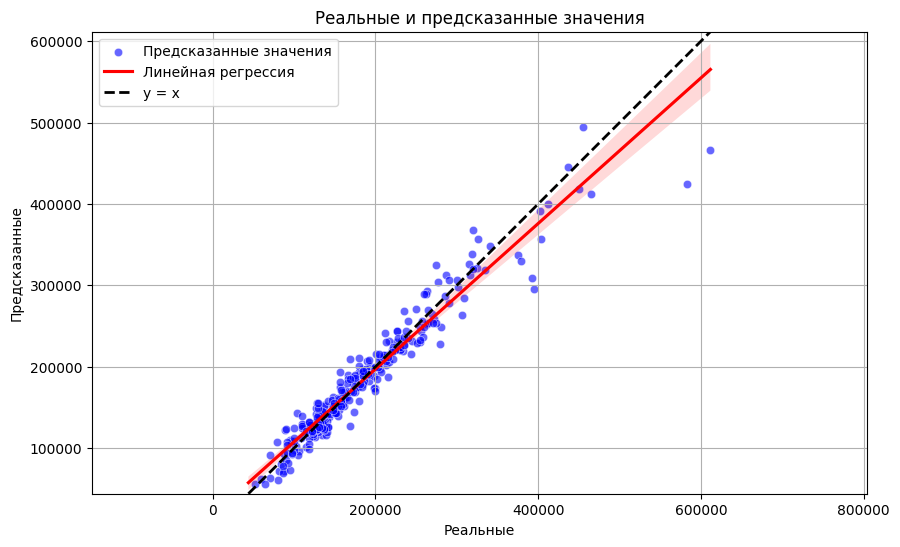

In [53]:
coef = best_model.coef_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6, label='Предсказанные значения')

sns.regplot(x=y_test, y=y_pred, scatter=False, color='red', line_kws={"label": "Линейная регрессия"}, label='Линейная регрессия')

plt.title("Реальные и предсказанные значения")
plt.xlabel("Реальные")
plt.ylabel("Предсказанные")
plt.legend()
plt.grid(True)
plt.axis('equal')  # Ось равномерного масштаба
plt.xlim([y_test.min(), y_test.max()])
plt.ylim([y_test.min(), y_test.max()])
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='y = x')  # Линия y=x
plt.legend()
plt.show()

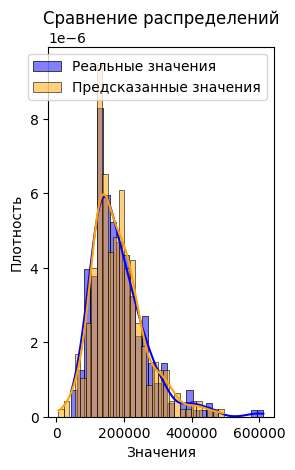

In [54]:
plt.subplot(1, 2, 2)
sns.histplot(y_test, color='blue', label='Реальные значения', kde=True, stat="density", bins=30, alpha=0.5)
sns.histplot(y_pred, color='orange', label='Предсказанные значения', kde=True, stat="density", bins=30, alpha=0.5)
plt.title("Сравнение распределений")
plt.xlabel("Значения")
plt.ylabel("Плотность")
plt.legend()

In [63]:
y_train_pred = grid_search.predict(X_train_scaled)
y_test_pred = grid_search.predict(X_test_scaled)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'MSE на обучающем наборе: {mse_train}')
print(f'MSE на тестовом наборе: {mse_test}')

percentage_increase = ((mse_test - mse_train) / mse_train) * 100
print(f'Процентная разница: {percentage_increase}%')

MSE на обучающем наборе: 380693761.01242447
MSE на тестовом наборе: 483698347.2842628
Процентная разница: 27.05707232971349%


#### Выводы
Ну какие выводы можно сделать...
Эти результаты показывают, что модель **Elastic Net**, настроенная с помощью параметров **alpha** и **l1_ratio**, достигает высоких показателей как в кросс-валидации, так и на тестовом наборе. Высокий *R²* и сравнительно низкий **MSE** на тестовом наборе указывают на то, что модель *хорошо обобщается* и может *эффективно делать предсказания*.

Разница **MSE** в сравнении на тестовом и итогом наборе составляет 27%, что указывает на некоторую переобученность, возможно даже высокую, но не настолько чтобы это считалось критическим 